In [209]:
import numpy as np
import cv2

with open('input.txt','r') as data:
    lines = data.readlines()


In [52]:
# part 1
grid = []
for line in lines:
    grid.append([int(l) for l in line.replace('\n','')])
grid = np.array(grid)

print(grid,'\n')

temp = np.zeros(grid.shape)

x,y = grid.shape

for i in range(x):
    for j in range(y):
        val = grid[i,j]
        #print(val,grid[:i,j],grid[i,:j],grid[i:,j],grid[i+1,j:])
        try:
            if val > np.max(grid[:i,j]) or val > np.max(grid[i+1:,j]):
                temp[i,j] = 1
        except:
            temp[i,j] = 1
        try:
            if val > np.max(grid[i,:j]) or val > np.max(grid[i,j+1:]):
                temp[i,j] = 1
        except:
            temp[i,j] = 1

temp2 = np.ones(grid.shape)
temp2[1:-1,1:-1] = temp[1:-1,1:-1]

print(temp2, np.sum(temp2))

[[2 3 0 ... 2 2 1]
 [3 2 2 ... 0 3 2]
 [2 2 0 ... 3 2 0]
 ...
 [2 2 1 ... 1 0 3]
 [3 2 1 ... 2 2 3]
 [1 2 2 ... 2 0 3]] 

[[1. 1. 1. ... 1. 1. 1.]
 [1. 0. 1. ... 0. 1. 1.]
 [1. 0. 0. ... 1. 1. 1.]
 ...
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]] 1684.0


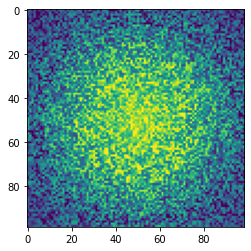

486540.0


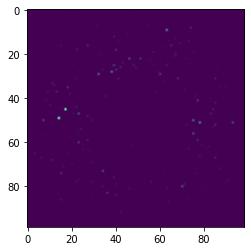

In [215]:
# part 2
import matplotlib.pyplot as plt

def find_view(val,grd):
    view = val > grd[::-1]
    tot = 0
    if np.sum(view)>0:
        for i in view:
            if i:
                tot += 1
            else:
                tot += 1
                break
    return tot

def find_view2(val,grd):
    view = val > grd
    tot = 0
    if np.sum(view)>0:
        for i in view:
            if i:
                tot += 1
            else:
                tot += 1
                break
    return tot


grid = []
for line in lines:
    grid.append([int(l) for l in line.replace('\n','')])
grid = np.array(grid)

temp = np.zeros(grid.shape)

x,y = grid.shape

for i in range(x):
    for j in range(y):
        val = grid[i,j]
        up = find_view(val,grid[:i,j])
        left = find_view(val,grid[i,:j])
        down = find_view2(val,grid[i+1:,j])
        right = find_view2(val,grid[i,j+1:])

        #print(val, up,left,down,right)

        temp[i,j] = (up*left*down*right)


temp2 = np.ones(grid.shape)
temp2[1:-1,1:-1] = temp[1:-1,1:-1]

plt.imshow(grid)
plt.show()
plt.imshow(temp)
print(np.max(temp))